In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pandas as pd
import numpy as np

import matplotlib as mpl
from scipy.stats import ttest_ind

# Load the evaluation results

In [2]:
res_df = pd.read_pickle('./results/global_refinement_benchmark_results/stats_results.pkl')

In [3]:
methods_pairwise = ['Spateo', 'PASTE', 'PASTE2', 'Moscot', 'SLAT', 'SLAT_GT', 'STAlign', 'STAlign_prealign', 'SPACEL']
res_sub = res_df[res_df['Method'].isin(methods_pairwise)]
my_palette_pairwise = [np.array([157,60,135]) / 255] + sns.color_palette('Paired')[0:3] + sns.color_palette('Paired')[4:6]+sns.color_palette('Paired')[6:8]+sns.color_palette('Paired')[11:12]

C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\396451689.py:9: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  g = sns.barplot(
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\396451689.py:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  g = sns.barplot(
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\396451689.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\396451689.py:39: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  sns.barplot(
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\396451689.py:39: FutureWarn

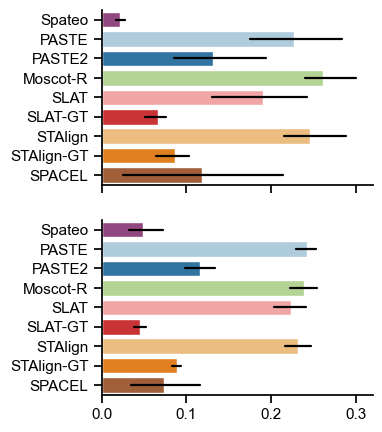

In [4]:
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR, 'axes.labelcolor' : COLOR})
fig, axs = plt.subplots(2,1,figsize=(3.5,5))
g = sns.barplot(
    x="mae", 
    y="Method",
    hue="Method",
    data=res_sub[res_sub['Higher_dataset'] == 's'],
    ax=axs[0],
    # edgecolor='black',
    palette=my_palette_pairwise,
    errwidth=1.6,
    hue_order=methods_pairwise,
    order=methods_pairwise,
    errcolor='black',
    label='pairwise',
)
axs[0].spines['bottom'].set_color(COLOR)
axs[0].spines['top'].set_color(COLOR) 
axs[0].spines['right'].set_color(COLOR)
axs[0].spines['left'].set_color(COLOR)

axs[0].set_xticks(np.arange(0,0.4,0.1))
axs[0].set_xticklabels([])
axs[0].set_ylabel('', color='black')
axs[0].set_xlabel('', color='black')
axs[0].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)
axs[0].set_title('')
axs[0].set_xlim([0,0.32])

sns.barplot(
    x="mae", 
    y="Method",
    hue="Method",
    data=res_sub[res_sub['Higher_dataset'] == 'w'],
    ax=axs[1],
    palette=my_palette_pairwise,
    errwidth=1.6,
    hue_order=methods_pairwise,
    order=methods_pairwise,
    errcolor='black',
)
axs[1].set_xlabel('', color='black')
axs[1].set_ylabel('', color='black')
axs[1].set_title('')
axs[1].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)
axs[1].set_xticks(np.arange(0,0.4,0.1))
axs[1].set_xlim([0,0.32])
axs[1].spines['bottom'].set_color(COLOR)
axs[1].spines['top'].set_color(COLOR) 
axs[1].spines['right'].set_color(COLOR)
axs[1].spines['left'].set_color(COLOR)

sns.despine(top=True, right=True)

# plt.savefig('./figures/global_refinement_benchmark/benchmark_pairwise.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [5]:
methods_global = ['Spateo_global', 'PASTE_global', 'PASTE2_global', 'Moscot_global', 'SLAT', 'SLAT_GT_global', 'STAlign', 'STAlign_prealign', 'SPACEL_global']
res_sub_global = res_df[res_df['Method'].isin(methods_global)]
my_palette_global = [np.array([202,178,214]) / 255] + sns.color_palette('tab20c')[3:4] + sns.color_palette('tab20c')[1:2]+ sns.color_palette('tab20c')[10:11] + sns.color_palette('Paired')[4:5] + sns.color_palette('tab20')[7:8] + sns.color_palette('Paired')[6:8] +  sns.color_palette('tab20')[11:12]

C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\1431905700.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  g = sns.barplot(
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\1431905700.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\1431905700.py:31: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  sns.barplot(
C:\Users\lyf04\AppData\Local\Temp\ipykernel_13840\1431905700.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)


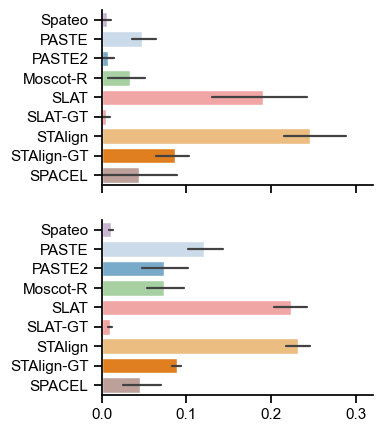

In [6]:
fig, axs = plt.subplots(2,1,figsize=(3.5,5))
g = sns.barplot(
    x="mae", 
    y="Method",
    hue="Method",
    data=res_sub_global[res_sub_global['Higher_dataset'] == 's'],
    ax=axs[0],
    palette=my_palette_global,
    errwidth=1.6,
    hue_order=methods_global,
    order=methods_global,
    label='pairwise',
)
axs[0].spines['bottom'].set_color(COLOR)
axs[0].spines['top'].set_color(COLOR) 
axs[0].spines['right'].set_color(COLOR)
axs[0].spines['left'].set_color(COLOR)

axs[0].set_xticks(np.arange(0,0.4,0.1))
axs[0].set_xticklabels([])
axs[0].set_ylabel('', color='black')
axs[0].set_xlabel('', color='black')
axs[0].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)
axs[0].set_title('')
axs[0].set_xlim([0,0.32])

sns.barplot(
    x="mae", 
    y="Method",
    hue="Method",
    data=res_sub_global[res_sub_global['Higher_dataset'] == 'w'],
    ax=axs[1],
    palette=my_palette_global,
    errwidth=1.6,
    hue_order=methods_global,
    order=methods_global,
)
axs[1].set_xlabel('', color='black')
axs[1].set_ylabel('', color='black')
axs[1].set_title('')
axs[1].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','SLAT-GT','STAlign', 'STAlign-GT', 'SPACEL', ], rotation=0)
axs[1].set_xticks(np.arange(0,0.4,0.1))
axs[1].set_xlim([0,0.32])
axs[1].spines['bottom'].set_color(COLOR)
axs[1].spines['top'].set_color(COLOR) 
axs[1].spines['right'].set_color(COLOR)
axs[1].spines['left'].set_color(COLOR)

sns.despine(top=True, right=True)

# plt.savefig('./figures/global_refinement_benchmark/benchmark_global.pdf', dpi=300, bbox_inches='tight', transparent=True)